# Mario Machine Learning Program

This is a project where Karolina, Joanne and Ben are going to work together to make a program that can detect whether the character image inputted is Mario or not

## Converting the images into arrays

In [83]:
import numpy as np
import random
from sklearn import svm
from skimage import io
from skimage.transform import resize
from sklearn.model_selection import train_test_split

images = []
categories = ['Mario', 'Luigi', 'Wario']
data = []

directory = 'images\\'

for category in categories:
    parent_folder = os.path.join(directory, category)
    label = categories.index(category)
    for filename in os.listdir(parent_folder):
        # Guard-clause to make sure only images are being loaded in
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_read = io.imread(os.path.join(parent_folder, filename), as_gray=True)
            img_resize = resize(img_read, (50,50))
            img = np.array(img_resize).flatten()
            data.append([img, label])
        else:
            continue


## Learning

In [84]:
random.shuffle(data)
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)

clf = svm.SVC(gamma=0.001, C=100.)

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.1)

clf.fit(x_train, y_train)

SVC(C=100.0, gamma=0.001)

## Predictions

### Prediction 1: Using test_mario1.png

In [85]:
import matplotlib.pyplot as plt

# Creating image arrays
test_mario_img = io.imread(os.path.join(directory, "Test Images", "test_mario1.png"))

test_mario_img_read = io.imread(os.path.join(directory, "Test Images", "test_mario1.png"), as_gray=True)
test_mario_img_resize = resize(test_mario_img_read, (50,50))
test_mario = np.array(test_mario_img_resize).flatten()

# Predicting the character
prediction_value_1 = clf.predict([test_mario])[0]
prediction_1 = categories[prediction_value_1]


### Prediction 2: Using test_luigi1.png

In [86]:
# Creating image arrays
test_luigi_img = io.imread(os.path.join(directory, "Test Images", "test_luigi1.png"))

test_luigi_img_read = io.imread(os.path.join(directory, "Test Images", "test_luigi1.png"), as_gray=True)
test_luigi_img_resize = resize(test_luigi_img_read, (50,50))
test_luigi = np.array(test_luigi_img_resize).flatten()

# Predicting the character
prediction_value_2 = clf.predict([test_luigi])[0]
prediction_2 = categories[prediction_value_2]

### Prediction 3: Using test_wario1.png

In [87]:
# Creating image arrays
test_wario_img = io.imread(os.path.join(directory, "Test Images", "test_wario1.png"))

test_wario_img_read = io.imread(os.path.join(directory, "Test Images", "test_wario1.png"), as_gray=True)
test_wario_img_resize = resize(test_wario_img_read, (50,50))
test_wario = np.array(test_wario_img_resize).flatten()

# Predicting the character
prediction_value_3 = clf.predict([test_wario])[0]
prediction_3 = categories[prediction_value_3]

### Prediction 4: Using a randomly picked image

In [88]:
import random

# Randomly selecting image
test_rnd_index = random.randint(0, len(categories) - 1)
test_rnd_category = categories[test_rnd_index]
test_rnd_folder = os.path.join(directory, test_rnd_category)
test_rnd_filename = random.choice(os.listdir(test_rnd_folder))
test_rnd_path = os.path.join(test_rnd_folder, test_rnd_filename)

# Creating the image arrays
test_rnd_img = io.imread(test_rnd_path)
test_rnd_grey = io.imread(test_rnd_path, as_gray=True)

test_rnd_resize = resize(test_rnd_grey, (50,50))
test_rnd = np.array(test_rnd_resize).flatten()

# Predicting the image
prediction_value_4 = clf.predict([test_rnd])[0]
prediction_4 = categories[prediction_value_4]

### Plotting the images and their results

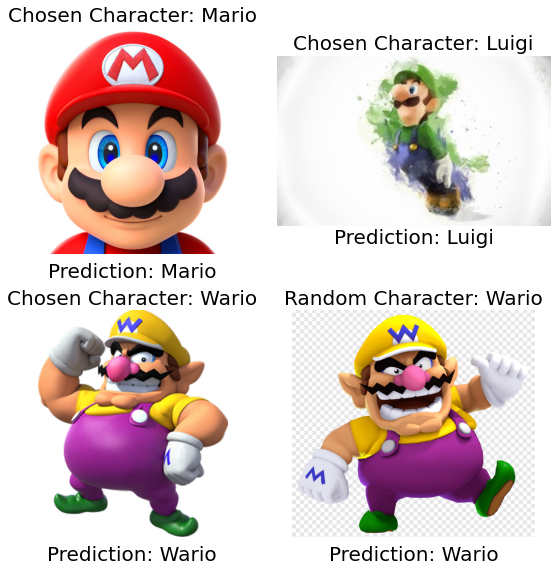

In [89]:
# Plotting the images with the prediction
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

ax = axes.ravel()

ax[0].imshow(test_mario_img, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title("Chosen Character: Mario", fontsize=20)
ax[0].text(0.5,-0.1,
         "Prediction: "+prediction_1,
         size=20, ha="center",
         transform=ax[0].transAxes)

ax[1].imshow(test_luigi_img, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title("Chosen Character: Luigi", fontsize=20)
ax[1].text(0.5,-0.1,
         "Prediction: "+prediction_2,
         size=20, ha="center",
         transform=ax[1].transAxes)

ax[2].imshow(test_wario_img, cmap=plt.cm.gray)
ax[2].axis('off')
ax[2].set_title("Chosen Character: Wario", fontsize=20)
ax[2].text(0.5,-0.1,
         "Prediction: "+prediction_3,
         size=20, ha="center",
         transform=ax[2].transAxes)

ax[3].imshow(test_rnd_img, cmap=plt.cm.gray)
ax[3].axis('off')
ax[3].set_title("Random Character: "+test_rnd_category, fontsize=20)
ax[3].text(0.5,-0.1,
         "Prediction: "+prediction_4,
         size=20, ha="center",
         transform=ax[3].transAxes)


fig.tight_layout()
plt.show()

## Time to do some learning: Mario Teaches Typing

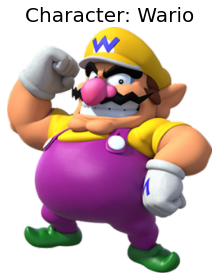

In [90]:
# Creating image arrays
test_img_read = io.imread(os.path.join(directory, "Test Images", "test_wario1.png"))

# Plotting the image
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

ax.imshow(test_img_read, cmap=plt.cm.gray)
ax.axis('off')
ax.set_title("Character: Wario", fontsize=20)

fig.tight_layout()
plt.show()

In [91]:
from sklearn.svm import SVC

test_img_read = io.imread(os.path.join(directory, "Test Images", "test_wario1.png"), as_gray=True)
test_img_resize = resize(test_img_read, (50,50))
test_img = np.array(test_img_resize).flatten()

clf = SVC()
clf.set_params(kernel='linear').fit(x_train, y_train)
prediction_value = clf.predict([test_img])[0]
prediction_character = categories[prediction_value]

print("The predicted character is:", prediction_character)

answ = input("Is this right? Y/N ")

##the guess never changes the second time
if answ == "N":
    clf = SVC()
    clf.set_params(kernel='rbf').fit(x_train, y_train)
    clf.predict([test_img])[0]
    print("The predicted character is:", prediction_character)

The predicted character is: Wario


In [92]:
##Used to be the while loop
while answ != "Y":
    clf = SVC()
    clf.set_params(kernel='rbf').fit(x_train, y_train)
    clf.predict([test_img])[0]
    print("The predicted character is:", prediction_character)
    answ = input("Is this right? Y/N ")
    if answ == "":
        break

## Accuracy

In [93]:
accuracy = round(clf.score(x_test, y_test), 3) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 58.3 %
